# tasks W-02

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import os
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib 
# import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

### load data

In [3]:
df_comp_details = pd.read_csv('duopoly_competition_details_quentin.csv')
df_comp_details.fillna(0, inplace=True)
df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,3JbhUV,1,1,NoisyMammoth,48.0,40.4,0,True,0.0,0.0
1,3JbhUV,1,2,NoisyMammoth,40.0,60.6,0,True,0.0,0.0
2,3JbhUV,1,3,NoisyMammoth,47.4,46.6,0,True,0.0,0.0


## (1) find based on your own competition details CSV the best (max revenue) capacity utilization curve

### (a) compute the revenue for all selling_seasons and competitions

In [4]:
df_comp_details['revenue'] =  df_comp_details['price'] * df_comp_details['demand']
df_comp_details['revenue'].describe()


count    30000.00000
mean        31.58603
std         49.39521
min          0.00000
25%          0.00000
50%          0.00000
75%         55.10000
max        455.20000
Name: revenue, dtype: float64

In [5]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)
df_comp_details['unique_selling_season_key'].nunique()

300

In [6]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()
dfx_rev.head()

,unique_selling_season_key,revenue
0,3JbhUV_1,3620.7
1,3JbhUV_10,3086.0
2,3JbhUV_100,3610.7
3,3JbhUV_11,3785.9
4,3JbhUV_12,3218.9


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

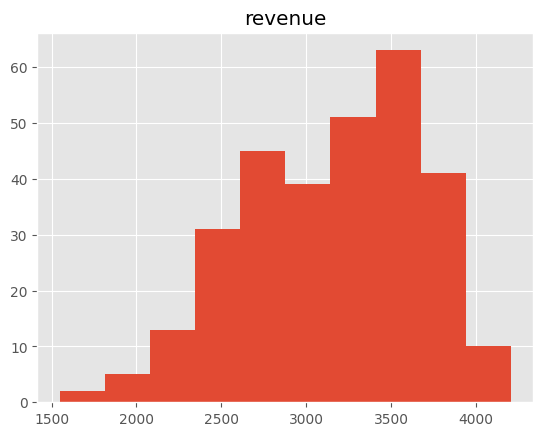

In [7]:
dfx_rev.hist()

In [8]:
dfx_rev.describe()

,revenue
count,300.000000
mean,3158.603000
std,523.116075
min,1549.100000
25%,2771.150000
50%,3224.200000
75%,3604.925000
max,4204.300000


### get the selling season keys with the top 20% revenue generation

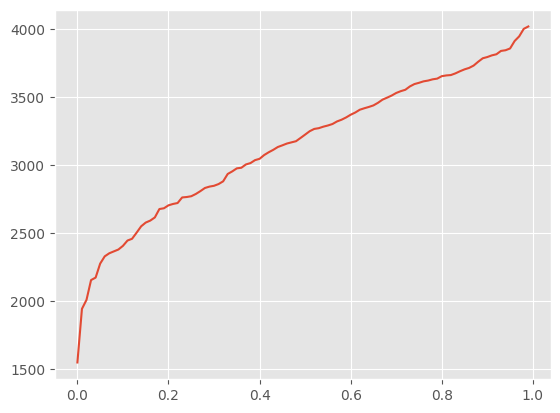

In [29]:
import numpy as np
dfx_rev['revenue'].quantile(0.9)
x = np.arange(0,1,0.01)
plt.plot(x , dfx_rev['revenue'].quantile(x))


In [10]:
top_selling_seasons = dfx_rev[dfx_rev['revenue'] >= dfx_rev['revenue'].quantile(0.95) ].unique_selling_season_key.unique()

print(top_selling_seasons)

['3JbhUV_13' '3JbhUV_14' '3JbhUV_2' '3JbhUV_3' '3JbhUV_44' '3JbhUV_54'
 '3JbhUV_55' '3JbhUV_64' '3JbhUV_74' '3JbhUV_76' '3JbhUV_82' '3JbhUV_91'
 '3JbhUV_92' 'fRMRTd_44' 'fRMRTd_64']


In [11]:
# quick double check
dfx_rev[dfx_rev.unique_selling_season_key.isin(top_selling_seasons)].revenue.mean()

3985.333333333333

### (b) compute the capacity utilization curves per selling season

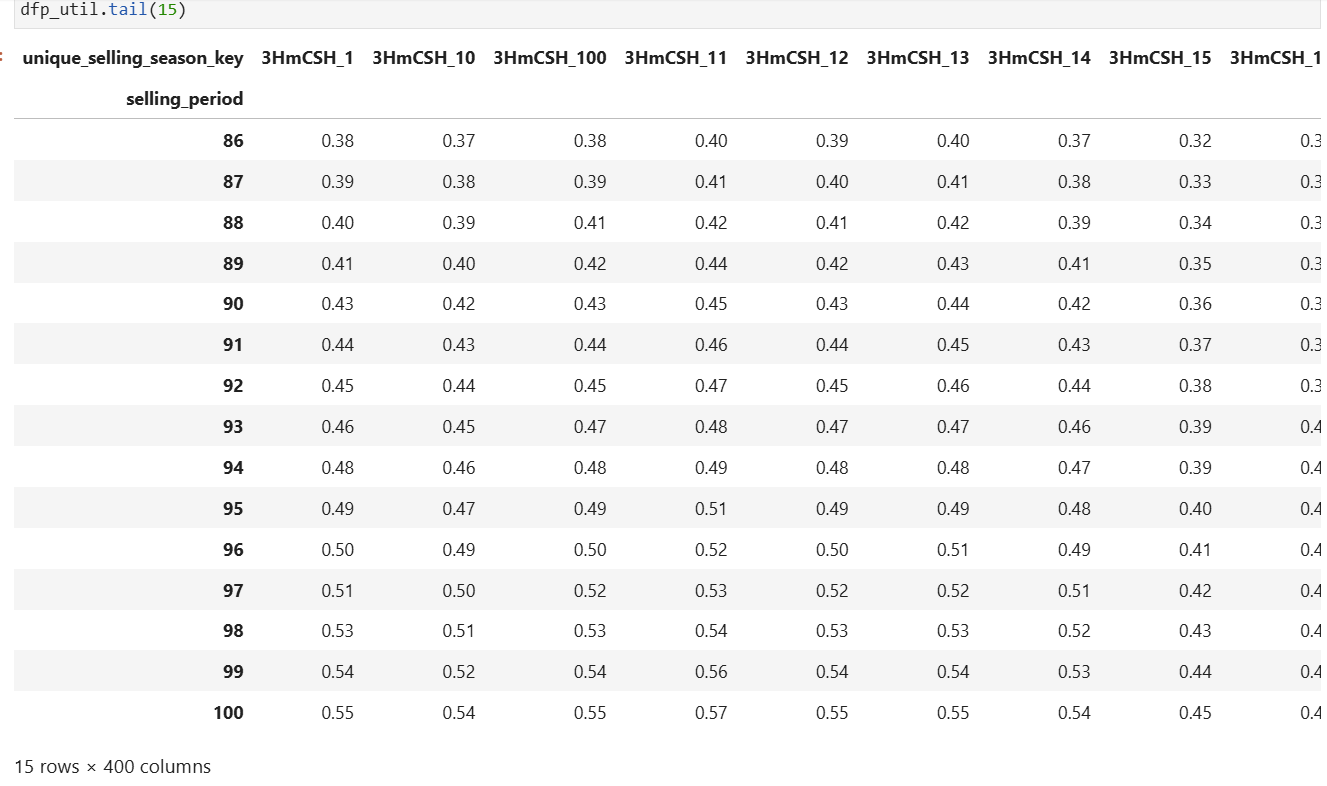

In [12]:
dfp_util = pd.pivot_table(df_comp_details, 
                        values='demand',
                        index = ['selling_period'],
                        columns=['unique_selling_season_key'],
                        aggfunc=np.mean,
                        
)
  
dfp_util.tail()

C:\Users\yannl\AppData\Local\Temp\ipykernel_25848\3999417997.py:1: FutureWarning: The provided callable <function mean at 0x000001AC7F7AA280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfp_util = pd.pivot_table(df_comp_details,


unique_selling_season_key,3JbhUV_1,3JbhUV_10,3JbhUV_100,3JbhUV_11,3JbhUV_12,3JbhUV_13,3JbhUV_14,3JbhUV_15,3JbhUV_16,3JbhUV_17,...,fRMRTd_90,fRMRTd_91,fRMRTd_92,fRMRTd_93,fRMRTd_94,fRMRTd_95,fRMRTd_96,fRMRTd_97,fRMRTd_98,fRMRTd_99
selling_period,,,,,,,,,,,,,,,,,,,,,
96,4.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,3.0,1.0,...,0.0,2.0,0.0,3.0,4.0,1.0,0.0,2.0,2.0,0.0
97,3.0,0.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
98,2.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
99,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6.0,0.0,4.0,0.0,3.0,2.0
100,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,...,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0


#### compute the utilization fractions

In [13]:
for c in dfp_util.columns:
    dfp_util[c] = dfp_util[c].cumsum()
    dfp_util[c] = round(dfp_util[c] / 80, 2)
    
dfp_util.tail(15)

unique_selling_season_key,3JbhUV_1,3JbhUV_10,3JbhUV_100,3JbhUV_11,3JbhUV_12,3JbhUV_13,3JbhUV_14,3JbhUV_15,3JbhUV_16,3JbhUV_17,...,fRMRTd_90,fRMRTd_91,fRMRTd_92,fRMRTd_93,fRMRTd_94,fRMRTd_95,fRMRTd_96,fRMRTd_97,fRMRTd_98,fRMRTd_99
selling_period,,,,,,,,,,,,,,,,,,,,,
86,0.72,0.61,0.81,0.70,0.57,0.92,0.94,0.44,0.65,0.62,...,0.78,0.48,0.70,0.52,0.64,0.65,0.69,0.51,0.80,0.65
87,0.74,0.62,0.82,0.78,0.60,0.94,0.94,0.46,0.66,0.64,...,0.80,0.48,0.75,0.55,0.66,0.65,0.69,0.52,0.80,0.66
88,0.76,0.62,0.84,0.80,0.64,0.96,0.94,0.48,0.68,0.65,...,0.81,0.51,0.76,0.55,0.69,0.65,0.70,0.52,0.84,0.69
89,0.78,0.62,0.84,0.81,0.68,1.00,0.94,0.48,0.69,0.69,...,0.81,0.51,0.79,0.55,0.71,0.65,0.71,0.55,0.84,0.70
90,0.79,0.64,0.85,0.84,0.69,1.00,0.95,0.48,0.71,0.69,...,0.88,0.52,0.79,0.60,0.74,0.65,0.75,0.59,0.84,0.74
91,0.79,0.69,0.88,0.84,0.76,1.00,0.95,0.48,0.74,0.69,...,0.96,0.55,0.84,0.61,0.74,0.66,0.75,0.62,0.85,0.75
92,0.81,0.69,0.91,0.85,0.76,1.00,0.95,0.48,0.76,0.69,...,1.00,0.59,0.84,0.61,0.75,0.69,0.79,0.62,0.86,0.79
93,0.81,0.72,0.95,0.85,0.81,1.00,0.98,0.51,0.76,0.72,...,1.00,0.59,0.85,0.61,0.79,0.70,0.82,0.68,0.90,0.80
94,0.81,0.74,0.95,0.85,0.84,1.00,0.99,0.54,0.76,0.74,...,1.00,0.59,0.85,0.62,0.82,0.70,0.85,0.71,0.90,0.81


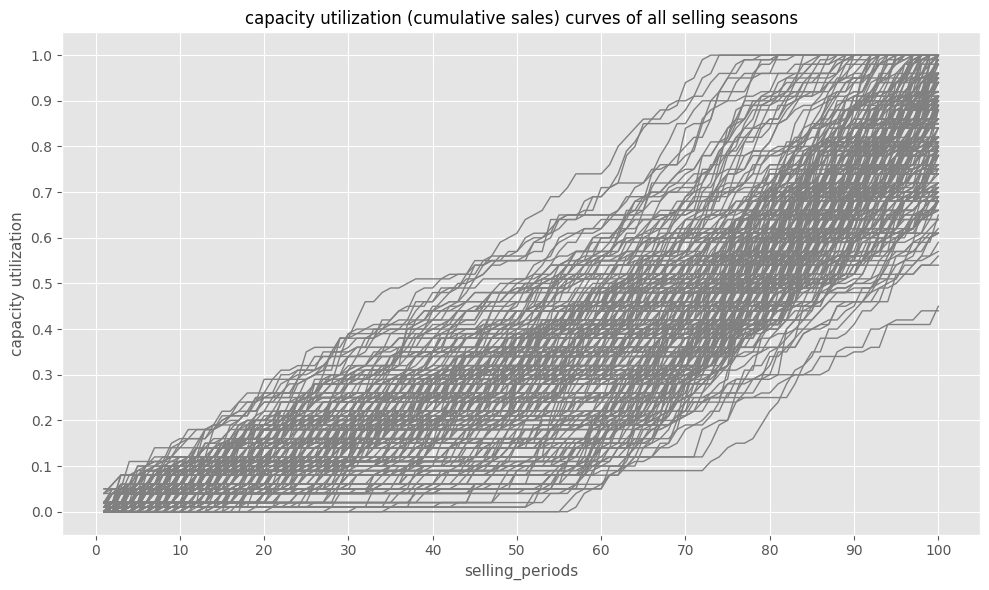

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_util.index, dfp_util, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of all selling seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

### show only the top revenue curves

In [15]:
dfp_top_curves = dfp_util[dfp_util.columns.intersection(top_selling_seasons)]
dfp_top_curves.shape

(100, 15)

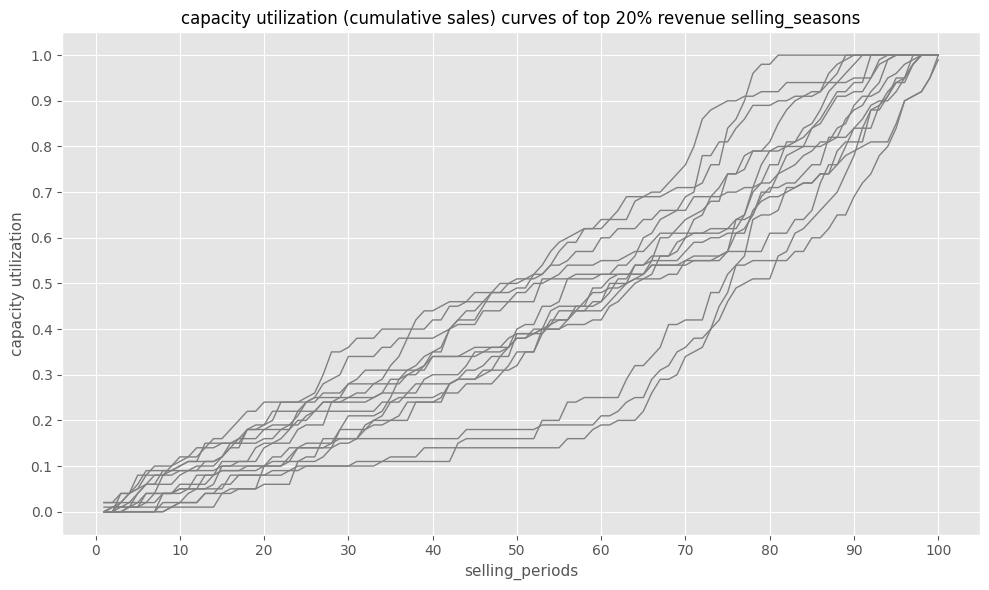

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_top_curves.index, dfp_top_curves, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

#### get the mean curve of the top revenue generating ones

<Axes: xlabel='selling_period'>

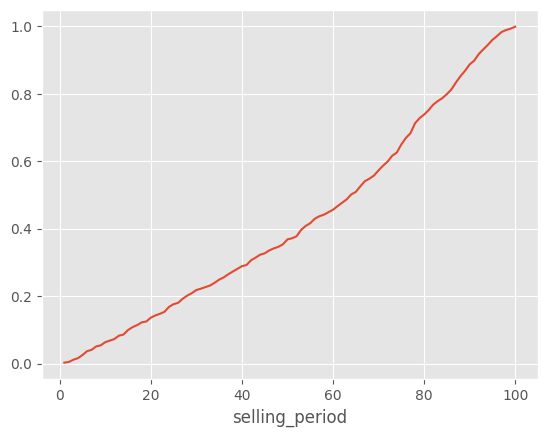

In [17]:
dfp_top_curves['mean_curve'] = dfp_top_curves.mean(axis=1)
dfp_top_curves['mean_curve'].plot()



#### generate dict to describe the cruve at every 5th selling period in the selling season

=== Courbe de ventes cible ===
Période (t) Capacité utilisée (%)    Sièges vendus  
-------------------------------------------------------
5           0.03                     2              
10          0.06                     4              
15          0.1                      8              
20          0.14                     11             
25          0.18                     14             
30          0.22                     17             
35          0.25                     20             
40          0.29                     23             
45          0.33                     26             
50          0.37                     29             
55          0.42                     33             
60          0.46                     36             
65          0.51                     40             
70          0.57                     45             
75          0.65                     52             
80          0.74                     59             
85          

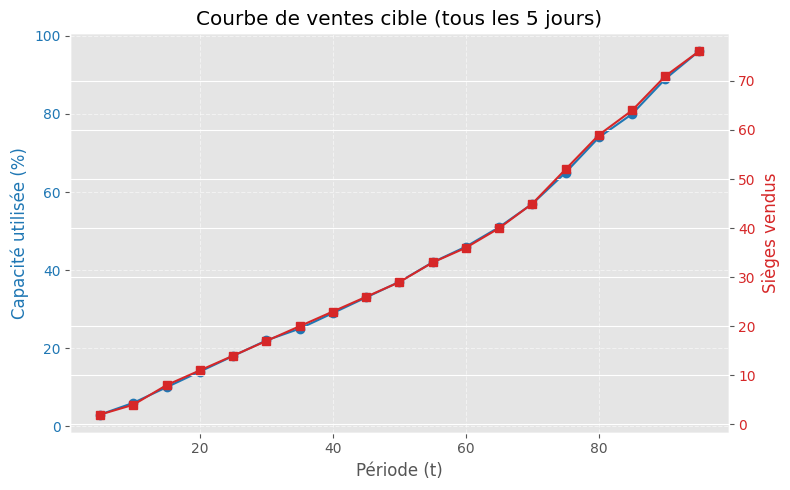

In [18]:
target_sales_curve = {}

for t in range(5, df_comp_details.selling_period.max(), 5):
    target = {}
    target['cap_util'] = round(dfp_top_curves.loc[t, 'mean_curve'], 2)
    target['sold_seats'] = int(target['cap_util'] * 80)  # 80 seats total
    target_sales_curve[t] = target


# --- Affichage tableau formaté --- #
print("=== Courbe de ventes cible ===")
print(f"{'Période (t)':<12}{'Capacité utilisée (%)':<25}{'Sièges vendus':<15}")
print("-" * 55)

for t in target_sales_curve.keys():
    cap = target_sales_curve[t]['cap_util']
    sold = target_sales_curve[t]['sold_seats']
    print(f"{t:<12}{cap:<25}{sold:<15}")

# --- Préparation des données pour le plot --- #
t_values = list(target_sales_curve.keys())
cap_values = [target_sales_curve[t]['cap_util'] * 100 for t in t_values]  # en %
sold_values = [target_sales_curve[t]['sold_seats'] for t in t_values]

# --- Création du graphique --- #
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Période (t)')
ax1.set_ylabel('Capacité utilisée (%)', color=color)
ax1.plot(t_values, cap_values, color=color, marker='o', label='Capacité utilisée (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

# Axe secondaire pour le nombre de sièges vendus
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sièges vendus', color=color)
ax2.plot(t_values, sold_values, color=color, marker='s', label='Sièges vendus')
ax2.tick_params(axis='y', labelcolor=color)

# --- Titre et légendes --- #
plt.title("Courbe de ventes cible (tous les 5 jours)")
fig.tight_layout()
plt.show()

In [19]:
with open('target_sales_curve_quentin.pkl', "wb") as f:
    pickle.dump(target_sales_curve, f, protocol=pickle.HIGHEST_PROTOCOL)

## (2) implement the logic to follow this capacity utilization curve by controlling the price to stay close to the curve 

## price up -> slow down sales 
## price down -> increase sales

#### prepare given demand input for given competition and given selling season

In [20]:
with open('target_sales_curve_quentin.pkl', 'rb') as f:
            target_curve = pickle.load(f)
target_curve

{5: {'cap_util': 0.03, 'sold_seats': 2},
 10: {'cap_util': 0.06, 'sold_seats': 4},
 15: {'cap_util': 0.1, 'sold_seats': 8},
 20: {'cap_util': 0.14, 'sold_seats': 11},
 25: {'cap_util': 0.18, 'sold_seats': 14},
 30: {'cap_util': 0.22, 'sold_seats': 17},
 35: {'cap_util': 0.25, 'sold_seats': 20},
 40: {'cap_util': 0.29, 'sold_seats': 23},
 45: {'cap_util': 0.33, 'sold_seats': 26},
 50: {'cap_util': 0.37, 'sold_seats': 29},
 55: {'cap_util': 0.42, 'sold_seats': 33},
 60: {'cap_util': 0.46, 'sold_seats': 36},
 65: {'cap_util': 0.51, 'sold_seats': 40},
 70: {'cap_util': 0.57, 'sold_seats': 45},
 75: {'cap_util': 0.65, 'sold_seats': 52},
 80: {'cap_util': 0.74, 'sold_seats': 59},
 85: {'cap_util': 0.8, 'sold_seats': 64},
 90: {'cap_util': 0.89, 'sold_seats': 71},
 95: {'cap_util': 0.96, 'sold_seats': 76}}

### load varriables as given in the duopoly p() function from our input data

In [21]:
# take first selling season
id = df_comp_details['unique_selling_season_key'].unique()[0]
df_select = df_comp_details[df_comp_details.unique_selling_season_key==id]

# define selling period
selling_period_in_current_season = 31

In [22]:
# get according deman object
demand_historical_in_current_season  = np.array(
            df_select[df_select.selling_period < selling_period_in_current_season]['demand']
)
demand_historical_in_current_season

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
# get according price object
prices_historical_in_current_season = [ 
    df_select[df_select.selling_period < selling_period_in_current_season]['price'], 
    df_select[df_select.selling_period < selling_period_in_current_season]['price_competitor'] ]
prices_historical_in_current_season  = np.array(prices_historical_in_current_season)

prices_historical_in_current_season

array([[40.4, 60.6, 46.6, 60. , 70.1, 70.2, 66.3, 50. , 64.3, 77.1, 32.5,
        44.9, 42.8, 66.1, 53.3, 41.5, 40.9, 41.1, 49. , 37.6, 36.1, 44.8,
        78.6, 74.5, 68.6, 35.7, 56.3, 35.2, 61.7, 71.1],
       [48. , 40. , 47.4, 50.5, 56.3, 65. , 73.8, 42.9, 48.2, 53.3, 60.5,
        65.8, 45.8, 32.1, 33.3, 35.8, 33.2, 31. , 35.7, 33.1, 31.6, 33.3,
        33.6, 35.8, 35. , 34.3, 33.2, 34. , 33.9, 34.6]])

### logic

In [24]:
last_price = prices_historical_in_current_season[0][-1]
last_price

71.1

In [25]:
current_sold_seats = demand_historical_in_current_season.sum()
current_sold_seats

10

In [26]:
print("old price: %.2f" % 150)
print(selling_period_in_current_season)
selling_period_in_current_season = 85
print(target_curve.keys())
if selling_period_in_current_season in target_curve.keys():
    
    target = target_curve[selling_period_in_current_season]
    target_sales = target['sold_seats']
    
    print("sold seats: %d " % current_sold_seats)
    print("target sold seats: %d " % target_sales)
    
    delta_in_sales =   current_sold_seats/target_sales - 1 
    print("percentage delta to target: %.2f" % delta_in_sales)
    
    ###
    # adjust price according to the delta
    price =  (delta_in_sales +1) * last_price 
    print("new price: %.2f" % price)
    

old price: 150.00
31
dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
sold seats: 10 
target sold seats: 64 
percentage delta to target: -0.84
new price: 11.11
